In [87]:
import numpy as np 
import matplotlib.pyplot as plt
import os 
import pandas as pd
import seaborn as sns
import importlib
import resultsOrg.helper_functions as hf
import seaborn as sns
from scipy import stats

importlib.reload(hf)
print('Modules loaded')

Modules loaded


# Comarping the different MAX_REPEATS simulations from the most recent versions of the code 

In [36]:
### Load in the files with 640 repeats and finished at 1555
#
file_list = os.listdir('MCMC_simulation_results/')

sweep_640_list = []

for file in file_list:
    if '241004-1555_MR_640_States_out' in file or '241014-1251__MR_640_States' in file:
        # print(file)
        full_path = 'MCMC_simulation_results/'+file
        sweep_640_list.append(hf.states_structure(full_path))

The filename is:  MCMC_simulation_results/241014-1251__MR_640_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.000000 k_force 0.000200 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 0.0, 'k_force': 0.0002, 'k_plus_SR_ref': 16.0, 'k_minus_SR_ref': 15.0}
The filename is:  MCMC_simulation_results/241004-1555_MR_640_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.500000 k_force 0.000200 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 0.5, 'k_force': 0.0002, 'k_plus_SR_ref': 16.0, 'k_minus_SR

In [37]:
### Load in the files with 160 repeats and finished at 1555
#
file_list = os.listdir('MCMC_simulation_results/')

sweep_160_list = []

for file in file_list:
    if '241004-1532_MR_160_States_out' in file or '241014-1253__MR_160_States' in file:
        # print(file)
        full_path = 'MCMC_simulation_results/'+file
        sweep_160_list.append(hf.states_structure(full_path))

The filename is:  MCMC_simulation_results/241004-1532_MR_160_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.750000 k_force 0.000200 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 0.75, 'k_force': 0.0002, 'k_plus_SR_ref': 16.0, 'k_minus_SR_ref': 15.0}
The filename is:  MCMC_simulation_results/241004-1532_MR_160_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.250000 k_force 0.000200 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 0.25, 'k_force': 0.0002, 'k_plus_SR_ref': 16.0, 'k_minus_S

In [35]:
sweep_160_list[0].parameters

{'k2_plus_ref': 0.0025,
 'k3_plus': 0.05,
 'k4_plus_ref': 0.135,
 'kB_plus_ref': 13.0,
 'kB_minus_ref': 0.1,
 'kCa_plus_ref': 0.09,
 'dATP': 0.75,
 'k_force': 0.0002,
 'k_plus_SR_ref': 16.0,
 'k_minus_SR_ref': 15.0}

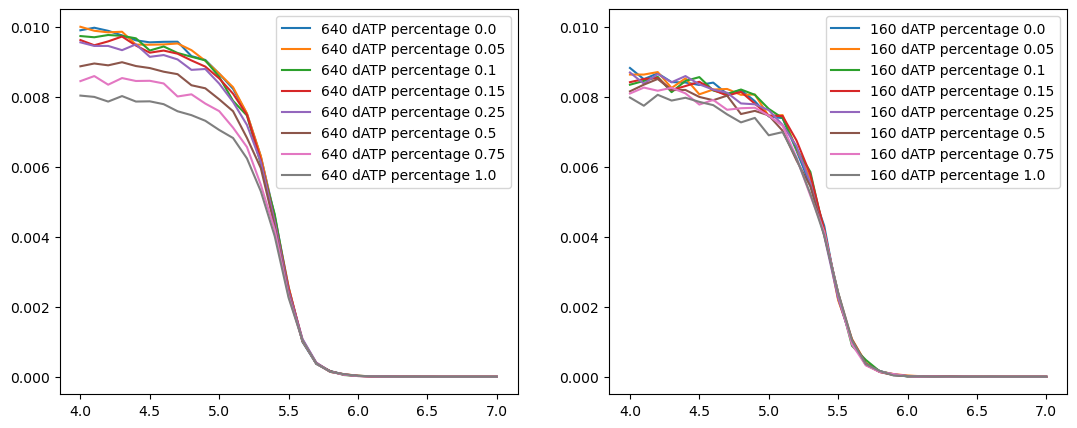

In [41]:
fig, ax = plt.subplots(1,2,figsize = (13,5))
for dATP in [0,0.05,0.1,0.15,0.25,0.5,0.75,1.0]:
    for data in sweep_640_list:
        variable = data.parameters['dATP']
        if variable == dATP:
            ax[0].plot(data.force_pCa, label = '640 dATP percentage {}'.format(variable))
            
    for data in sweep_160_list:
        variable = data.parameters['dATP']
        if variable == dATP:
            ax[1].plot(data.force_pCa,  label = '160 dATP percentage {}'.format(variable))
            
ax[1].set_ylim(ax[0].get_ylim())

    
ax[0].legend()
ax[1].legend()

### Comparison of the "default" parameters but actually at the default parameters are fed in 

In [144]:
default_160 = hf.states_structure('MCMC_simulation_results/241014-1348__MR_160_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')

default_640 = hf.states_structure('MCMC_simulation_results/241014-1355__MR_640_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')

The filename is:  MCMC_simulation_results/241014-1348__MR_160_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 0.0, 'k_force': 0.2, 'k_plus_SR_ref': 16.0, 'k_minus_SR_ref': 15.0}
The filename is:  MCMC_simulation_results/241014-1355__MR_640_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 0.0, 'k_force': 0.2, 'k_plus_SR_ref': 16.0, 'k_minus_SR_ref'

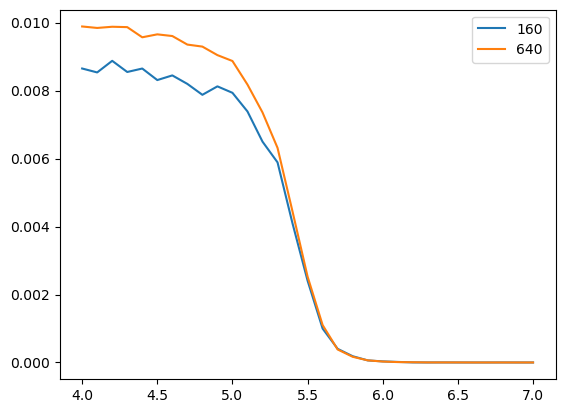

In [145]:
plt.figure()
plt.plot(default_160.force_pCa, label = 160)
plt.plot(default_640.force_pCa, label = 640)
plt.legend()

In [149]:
default_640_full = hf.states_structure('MCMC_simulation_results/241014-1505__MR_640_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')

default_160_full = hf.states_structure('MCMC_simulation_results//241014-1508__MR_160_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')

The filename is:  MCMC_simulation_results/241014-1505__MR_640_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 1.0, 'k_force': 0.2, 'k_plus_SR_ref': 16.0, 'k_minus_SR_ref': 15.0}
The filename is:  MCMC_simulation_results//241014-1508__MR_160_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 1.0, 'k_force': 0.2, 'k_plus_SR_ref': 16.0, 'k_minus_SR_ref

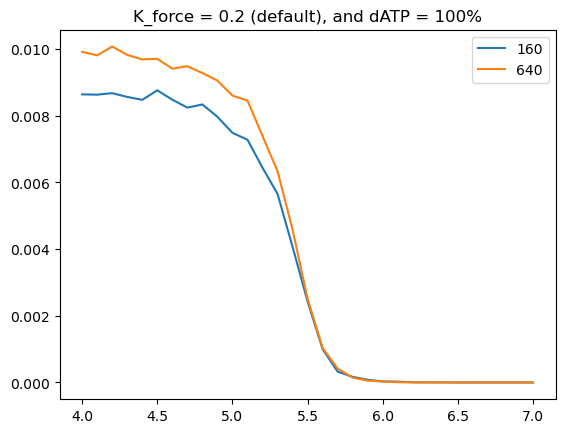

In [152]:
plt.figure()
plt.plot(default_160_full.force_pCa, label = 160)
plt.plot(default_640_full.force_pCa, label = 640)
plt.title('K_force = 0.2 (default), and dATP = 100%')
plt.legend()

In [155]:
#### Attempting to converge with lower k_force but 100% dATP. 

lower_kforce_640 = hf.states_structure('MCMC_simulation_results/241015-0743__MR_640_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 0.002000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')


lower_kforce_160 = hf.states_structure('MCMC_simulation_results/241014-1649__MR_160_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 0.002000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')


The filename is:  MCMC_simulation_results/241015-0743__MR_640_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 0.002000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 1.0, 'k_force': 0.002, 'k_plus_SR_ref': 16.0, 'k_minus_SR_ref': 15.0}
The filename is:  MCMC_simulation_results/241014-1649__MR_160_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 0.002000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 1.0, 'k_force': 0.002, 'k_plus_SR_ref': 16.0, 'k_minus_SR_

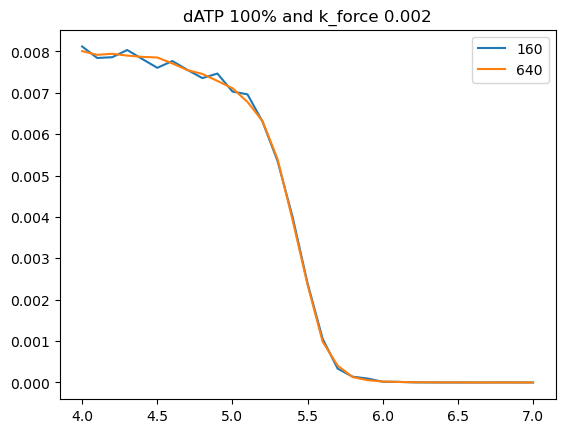

In [162]:
plt.plot(lower_kforce_160.force_pCa, label = 160)
plt.plot(lower_kforce_640.force_pCa, label = 640)
plt.title('dATP 100% and k_force '+str(lower_kforce_160.parameters['k_force']))
plt.legend()


The filename is:  MCMC_simulation_results/241015-0810__MR_160_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 1.0, 'k_force': 0.2, 'k_plus_SR_ref': 16.0, 'k_minus_SR_ref': 15.0}
The filename is:  MCMC_simulation_results/241015-0805__MR_640_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 1.0, 'k_force': 0.2, 'k_plus_SR_ref': 16.0, 'k_minus_SR_ref'

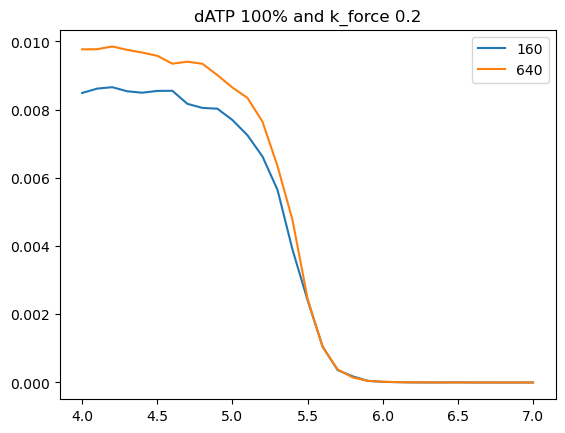

In [167]:
repeat_defaults_160 = hf.states_structure('MCMC_simulation_results/241015-0810__MR_160_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')

repeat_defaults_640 = hf.states_structure('MCMC_simulation_results/241015-0805__MR_640_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')


plt.plot(repeat_defaults_160.force_pCa, label = 160)
plt.plot(repeat_defaults_640.force_pCa, label = 640)
plt.title('dATP 100% and k_force '+str(repeat_defaults_160.parameters['k_force']))
plt.legend()

The filename is:  MCMC_simulation_results/241015-0823__MR_160_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 1.0, 'k_force': 800.0, 'k_plus_SR_ref': 16.0, 'k_minus_SR_ref': 15.0}
The filename is:  MCMC_simulation_results/241015-0830_MR_640_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 1.0, 'k_force': 800.0, 'k_plus_SR_ref': 16.0, 'k_minus_

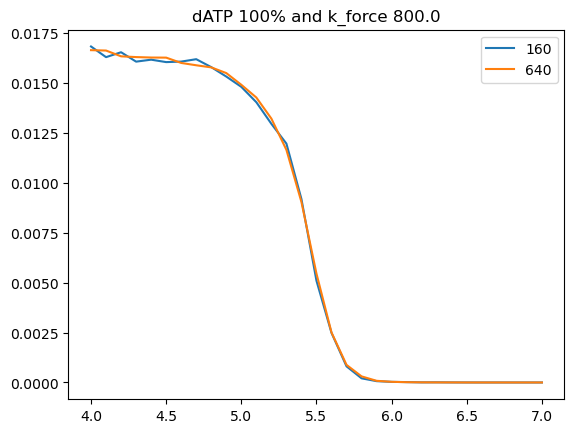

In [169]:
increase_kf_160 = hf.states_structure('MCMC_simulation_results/241015-0823__MR_160_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')

increase_kf_640 = hf.states_structure('MCMC_simulation_results/241015-0830_MR_640_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')

plt.plot(increase_kf_160.force_pCa, label = 160)
plt.plot(increase_kf_640.force_pCa, label = 640)
plt.title('dATP 100% and k_force '+str(increase_kf_160.parameters['k_force']))
plt.legend()

The filename is:  /crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-0851_MR_160_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.000000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 0.0, 'k_force': 800.0, 'k_plus_SR_ref': 16.0, 'k_minus_SR_ref': 15.0}
The filename is:  /crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-0851_MR_160_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.500000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1

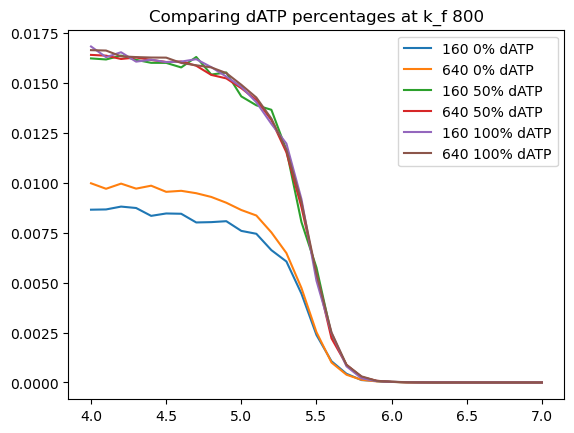

In [180]:
sim_160_high_kf_0_dATP = hf.states_structure('/crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-0851_MR_160_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.000000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')

sim_160_high_kf_05_dATP = hf.states_structure('/crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-0851_MR_160_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.500000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')

sim_640_high_kf_0_dATP = hf.states_structure('/crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-0843_MR_640_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.000000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')

sim_640_high_kf_05_dATP = hf.states_structure('/crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-0843_MR_640_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.500000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')

plt.plot(sim_160_high_kf_0_dATP.force_pCa, label = '160 0% dATP')
plt.plot(sim_640_high_kf_0_dATP.force_pCa, label = '640 0% dATP')


plt.plot(sim_160_high_kf_05_dATP.force_pCa, label = '160 50% dATP')
plt.plot(sim_640_high_kf_05_dATP.force_pCa, label = '640 50% dATP')


plt.plot(increase_kf_160.force_pCa, label = '160 100% dATP')
plt.plot(increase_kf_640.force_pCa, label = '640 100% dATP')

plt.title('Comparing dATP percentages at k_f 800')


plt.legend()

increase_kf_640.parameters['MAX_REPEATS'] = 640


In [181]:
repeat_1280_dATP_0 = hf.states_structure('/crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-1043_MR_1280_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.000000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')

repeat_1280_dATP_05 = hf.states_structure('/crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-1043_MR_1280_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.500000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')

repeat_1280_dATP_100 = hf.states_structure('/crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-1043_MR_1280_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv')




The filename is:  /crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-1043_MR_1280_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.000000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 0.0, 'k_force': 800.0, 'k_plus_SR_ref': 16.0, 'k_minus_SR_ref': 15.0}
The filename is:  /crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-1043_MR_1280_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.500000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0

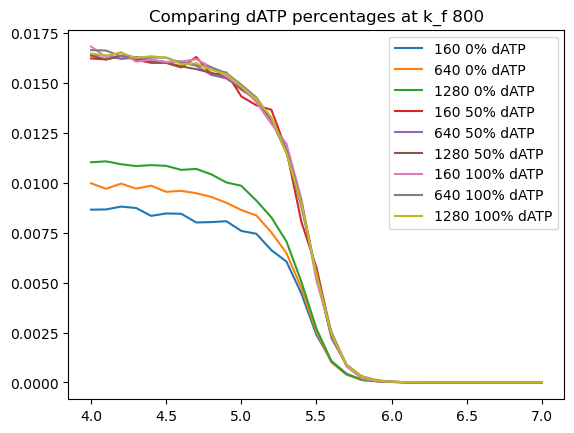

In [182]:
plt.plot(sim_160_high_kf_0_dATP.force_pCa, label = '160 0% dATP')
plt.plot(sim_640_high_kf_0_dATP.force_pCa, label = '640 0% dATP')
plt.plot(repeat_1280_dATP_0.force_pCa, label = '1280 0% dATP')




plt.plot(sim_160_high_kf_05_dATP.force_pCa, label = '160 50% dATP')
plt.plot(sim_640_high_kf_05_dATP.force_pCa, label = '640 50% dATP')
plt.plot(repeat_1280_dATP_05.force_pCa, label = '1280 50% dATP')


plt.plot(increase_kf_160.force_pCa, label = '160 100% dATP')
plt.plot(increase_kf_640.force_pCa, label = '640 100% dATP')
plt.plot(repeat_1280_dATP_100.force_pCa, label = '1280 100% dATP')

plt.title('Comparing dATP percentages at k_f 800')



plt.legend()

increase_kf_640.parameters['MAX_REPEATS'] = 640

In [186]:
rep_6400_list = []

# dATP 0 
rep_6400_list.append(hf.states_structure('/crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-1313_MR_6400_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.000000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv'))
rep_6400_list[-1].parameters['MAX_REPS'] = 6400

# dATP 0.25 
rep_6400_list.append(hf.states_structure('/crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-1313_MR_6400_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.250000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv'))
rep_6400_list[-1].parameters['MAX_REPS'] = 6400

# dATP 0.50 
rep_6400_list.append(hf.states_structure('/crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-1313_MR_6400_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.500000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv'))
rep_6400_list[-1].parameters['MAX_REPS'] = 6400

# dATP 1.00
rep_6400_list.append(hf.states_structure('/crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-1313_MR_6400_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 1.000000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv'))
rep_6400_list[-1].parameters['MAX_REPS'] = 6400



The filename is:  /crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-1313_MR_6400_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.000000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0.1, 'kCa_plus_ref': 0.09, 'dATP': 0.0, 'k_force': 800.0, 'k_plus_SR_ref': 16.0, 'k_minus_SR_ref': 15.0}
The filename is:  /crucial/temp_MCMC/dATP_multiscale_modeling/MCMC_simulation_results/241015-1313_MR_6400_States_out k2_plus_ref 0.002500 k3_plus 0.050000 k4_plus_ref 0.135000 kB_plus_ref 13.000000 kB_minus_ref 0.100000 kCa_plus_ref 0.090000 dATP 0.250000 k_force 800.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
Read in parameters {'k2_plus_ref': 0.0025, 'k3_plus': 0.05, 'k4_plus_ref': 0.135, 'kB_plus_ref': 13.0, 'kB_minus_ref': 0

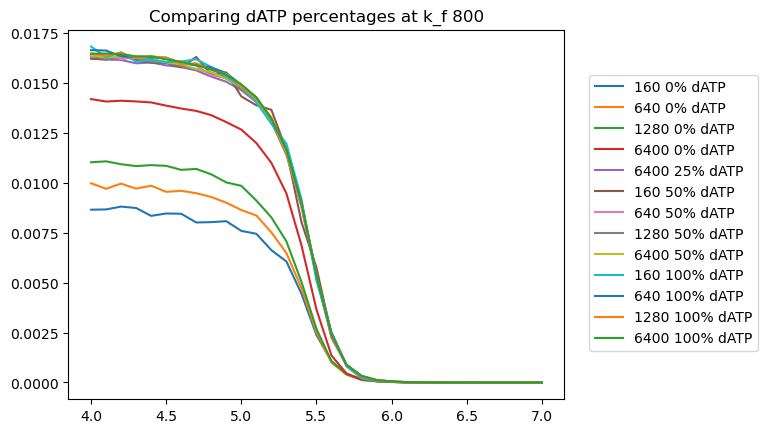

In [198]:
plt.plot(sim_160_high_kf_0_dATP.force_pCa, label = '160 0% dATP')
plt.plot(sim_640_high_kf_0_dATP.force_pCa, label = '640 0% dATP')
plt.plot(repeat_1280_dATP_0.force_pCa, label = '1280 0% dATP')

plt.plot(rep_6400_list[0].force_pCa, label = '6400 0% dATP')



plt.plot(rep_6400_list[1].force_pCa, label = '6400 25% dATP')

plt.plot(sim_160_high_kf_05_dATP.force_pCa, label = '160 50% dATP')
plt.plot(sim_640_high_kf_05_dATP.force_pCa, label = '640 50% dATP')
plt.plot(repeat_1280_dATP_05.force_pCa, label = '1280 50% dATP')
plt.plot(rep_6400_list[2].force_pCa, label = '6400 50% dATP')

plt.plot(increase_kf_160.force_pCa, label = '160 100% dATP')
plt.plot(increase_kf_640.force_pCa, label = '640 100% dATP')
plt.plot(repeat_1280_dATP_100.force_pCa, label = '1280 100% dATP')
plt.plot(rep_6400_list[3].force_pCa, label = '6400 100% dATP')


plt.title('Comparing dATP percentages at k_f 800')



plt.legend(loc = (1.05,0.13))

increase_kf_640.parameters['MAX_REPEATS'] = 640

(4.0, 5.0)

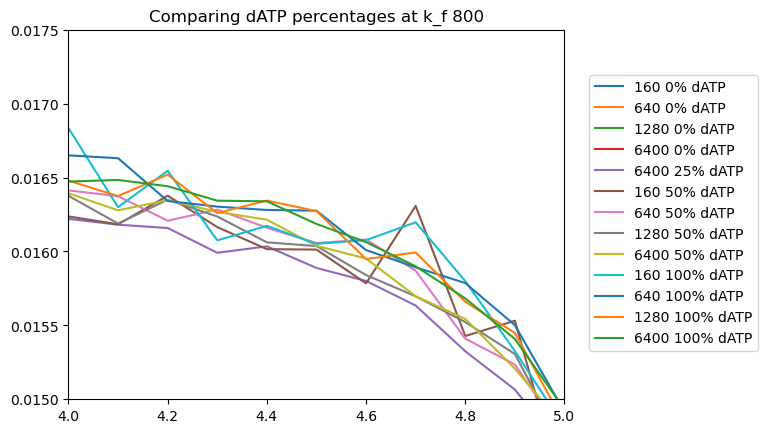

In [197]:
plt.plot(sim_160_high_kf_0_dATP.force_pCa, label = '160 0% dATP')
plt.plot(sim_640_high_kf_0_dATP.force_pCa, label = '640 0% dATP')
plt.plot(repeat_1280_dATP_0.force_pCa, label = '1280 0% dATP')

plt.plot(rep_6400_list[0].force_pCa, label = '6400 0% dATP')



plt.plot(rep_6400_list[1].force_pCa, label = '6400 25% dATP')

plt.plot(sim_160_high_kf_05_dATP.force_pCa, label = '160 50% dATP')
plt.plot(sim_640_high_kf_05_dATP.force_pCa, label = '640 50% dATP')
plt.plot(repeat_1280_dATP_05.force_pCa, label = '1280 50% dATP')
plt.plot(rep_6400_list[2].force_pCa, label = '6400 50% dATP')

plt.plot(increase_kf_160.force_pCa, label = '160 100% dATP')
plt.plot(increase_kf_640.force_pCa, label = '640 100% dATP')
plt.plot(repeat_1280_dATP_100.force_pCa, label = '1280 100% dATP')
plt.plot(rep_6400_list[3].force_pCa, label = '6400 100% dATP')


plt.title('Comparing dATP percentages at k_f 800')



plt.legend(loc = (1.05,0.13))

increase_kf_640.parameters['MAX_REPEATS'] = 640

plt.ylim(0.015,0.0175)
plt.xlim(4,5)

In [228]:
def sum_states_by_pca(df):
    return_df = pd.DataFrame(df['Time'])
    pCa = 7
    while pCa >=4:
        
        # Filter columns for the specified pCa value
        state_columns = [col for col in df.columns if f' {pCa:.1f}' in col]

        # Calculate the sum of the states at each time point for the given pCa
        new_column_name = f'Sum pCa {pCa:.1f}'
        return_df[new_column_name] = df[state_columns].sum(axis=1)
        pCa -= 0.1
    
    return return_df 


return_df = sum_states_by_pca(sim_160_high_kf_0_dATP.states_df)

(return_df[[col for col in return_df.columns if f' pCa' in col]].max().max()-1)*100

(return_df[[col for col in return_df.columns if f' pCa' in col]].min().min()-1)*100

-0.00014600000000086766

In [199]:
sim_160_high_kf_0_dATP.states_df[]

,Time,M2 7.0,M1 7.0,C 7.0,B 7.0,OFF 7.0,M2 6.9,M1 6.9,C 6.9,B 6.9,...,M2 4.1,M1 4.1,C 4.1,B 4.1,OFF 4.1,M2 4.0,M1 4.0,C 4.0,B 4.0,OFF 4.0
0,0.0,0,0,0.000000,0.083894,0.916107,0.0,0.0,0.000000,0.083894,...,0.000000,0.000000,0.000000,0.084135,0.915867,0.000000,0.000000,0.000000,0.083173,0.916828
1,0.5,0,0,0.000000,0.548077,0.451923,0.0,0.0,0.000000,0.542067,...,0.000000,0.000000,0.000481,0.559856,0.439663,0.000000,0.000000,0.000962,0.544952,0.454087
2,1.0,0,0,0.000000,0.551923,0.448077,0.0,0.0,0.000000,0.555529,...,0.000000,0.000000,0.002163,0.537740,0.460096,0.000000,0.000000,0.001202,0.541587,0.457212
3,1.5,0,0,0.000000,0.553125,0.446875,0.0,0.0,0.000240,0.550481,...,0.000000,0.000000,0.007933,0.525240,0.466827,0.000000,0.000000,0.006010,0.549519,0.444471
4,2.0,0,0,0.000000,0.551683,0.448317,0.0,0.0,0.000000,0.540865,...,0.000000,0.000000,0.009375,0.546154,0.444471,0.000000,0.000000,0.005529,0.554087,0.440385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,1998.0,0,0,0.000481,0.545673,0.453846,0.0,0.0,0.001202,0.565625,...,0.011298,0.019711,0.476683,0.110096,0.382212,0.007933,0.015865,0.475240,0.106731,0.394231
3997,1998.5,0,0,0.000721,0.551683,0.447596,0.0,0.0,0.000481,0.547356,...,0.010817,0.019711,0.467788,0.106971,0.394712,0.008173,0.016106,0.452404,0.105529,0.417788
3998,1999.0,0,0,0.000481,0.569711,0.429808,0.0,0.0,0.000240,0.555769,...,0.010337,0.019711,0.465865,0.106010,0.398077,0.007692,0.016587,0.464904,0.110096,0.400721
3999,1999.5,0,0,0.000481,0.547115,0.452404,0.0,0.0,0.000481,0.562019,...,0.009856,0.020914,0.479087,0.106490,0.383654,0.007692,0.016587,0.456490,0.106731,0.412500


160 repeats 100% 4.4162234019733096e-07
640 repeats 100% 6.451093018606662e-07
1280 repeats 100% 1.6024374818316862e-06
6400 repeats 100% 8.50562621504996e-06


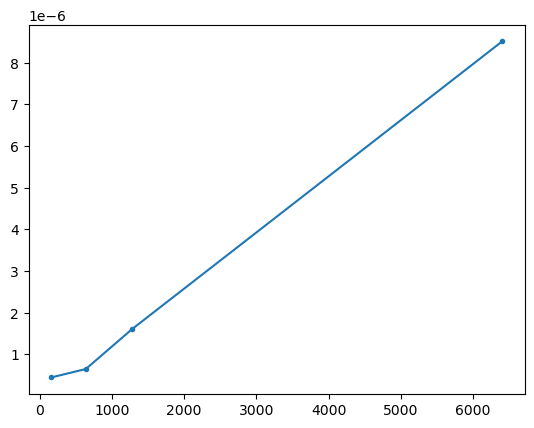

In [255]:
print('160 repeats 100%',np.std(sum_states_by_pca(increase_kf_160.states_df).iloc[:,1:].values)) # 160 100 % dATP 
print('640 repeats 100%',np.std(sum_states_by_pca(increase_kf_640.states_df).iloc[:,1:].values)) # 640 100 % dATP 
print('1280 repeats 100%',np.std(sum_states_by_pca(repeat_1280_dATP_100.states_df).iloc[:,1:].values)) # 1280 100 % dATP 
print('6400 repeats 100%',np.std(sum_states_by_pca(rep_6400_list[3].states_df).iloc[:,1:].values)) #6400 100% dATP 

stdevs = [np.std(sum_states_by_pca(increase_kf_160.states_df).iloc[:,1:].values),
         np.std(sum_states_by_pca(increase_kf_640.states_df).iloc[:,1:].values),
          np.std(sum_states_by_pca(repeat_1280_dATP_100.states_df).iloc[:,1:].values),
          np.std(sum_states_by_pca(rep_6400_list[3].states_df).iloc[:,1:].values)]


repeats = [160,640,1280,6400]

plt.plot(repeats, stdevs,'.-')

### Visualization and understanding of the different simulations output files. 


In [2]:
# States out File
# Using example file: States_out dATP 1.000000 k_force 0.100000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
file_name = 'States_out dATP 1.000000 k_force 0.100000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv'

pd.read_csv(file_name, header = None)
columns_list = ['Time'] # unit unknown 
for i in np.arange(7,3.9,-0.1):
    for j in ['M2','M1','C','B','OFF']:
        new_item = ('{} {}'.format(j,round(i,1)))
        columns_list.append(new_item)
        
states_df = pd.read_csv(file_name, names = columns_list)

states_df

,Time,M2 7.0,M1 7.0,C 7.0,B 7.0,OFF 7.0,M2 6.9,M1 6.9,C 6.9,B 6.9,...,M2 4.1,M1 4.1,C 4.1,B 4.1,OFF 4.1,M2 4.0,M1 4.0,C 4.0,B 4.0,OFF 4.0
0,0.0,0,0,0.000000,0.084074,0.915935,0,0.0,0.000000,0.084524,...,0.000000,0.000000,0.000000,0.084795,0.915214,0.000000,0.000000,0.000000,0.084014,0.915995
1,0.5,0,0,0.000000,0.551863,0.448136,0,0.0,0.000000,0.549519,...,0.000000,0.000000,0.001202,0.546814,0.451983,0.000000,0.000000,0.001112,0.556730,0.442157
2,1.0,0,0,0.000000,0.550030,0.449970,0,0.0,0.000030,0.549038,...,0.000000,0.000000,0.002885,0.555859,0.441256,0.000000,0.000000,0.003275,0.547415,0.449309
3,1.5,0,0,0.000000,0.554236,0.445763,0,0.0,0.000000,0.551201,...,0.000000,0.000000,0.004507,0.544711,0.450781,0.000000,0.000000,0.004687,0.549218,0.446093
4,2.0,0,0,0.000030,0.552103,0.447867,0,0.0,0.000060,0.552253,...,0.000000,0.000000,0.007031,0.549669,0.443299,0.000000,0.000000,0.007212,0.544201,0.448587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,1998.0,0,0,0.000481,0.557091,0.442428,0,0.0,0.000661,0.551472,...,0.009495,0.023768,0.516917,0.109374,0.340444,0.009676,0.025060,0.514002,0.109585,0.341677
3997,1998.5,0,0,0.000421,0.553094,0.446485,0,0.0,0.000661,0.554597,...,0.009495,0.023888,0.517217,0.110486,0.338912,0.009315,0.025120,0.516526,0.109825,0.339213
3998,1999.0,0,0,0.000481,0.552343,0.447175,0,0.0,0.000541,0.555679,...,0.009585,0.023618,0.515324,0.109435,0.342037,0.009345,0.025421,0.516376,0.110697,0.338161
3999,1999.5,0,0,0.000451,0.547866,0.451683,0,0.0,0.000601,0.550210,...,0.009525,0.024008,0.513401,0.111207,0.341857,0.009405,0.025481,0.515174,0.110907,0.339032


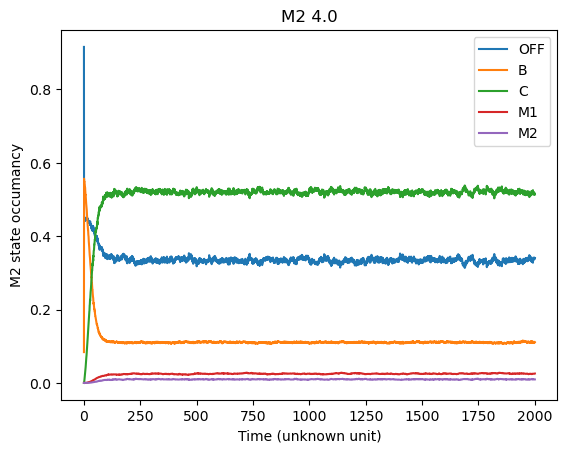

In [3]:
def plot_states(states_df, state_label = 'M2',pCa= 4):
    key = '{} {}'.format(state_label,round(float(pCa),1))
    
    plt.plot(states_df['Time'], states_df[key], label = state_label)
    plt.title(key)
    plt.xlabel('Time (unknown unit)')
    plt.ylabel('{} state occumancy'.format(state_label))
    
plt.figure()

pCa = 4
plot_states(states_df, 'OFF',pCa)
plot_states(states_df, 'B',pCa)
plot_states(states_df, 'C',pCa)
plot_states(states_df, 'M1',pCa)
plot_states(states_df, 'M2',pCa)
plt.legend()

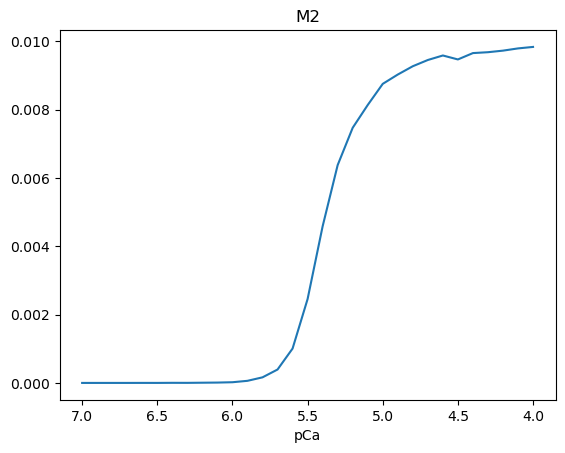

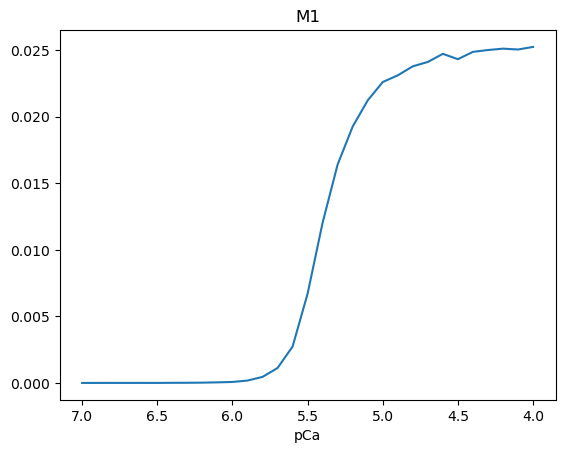

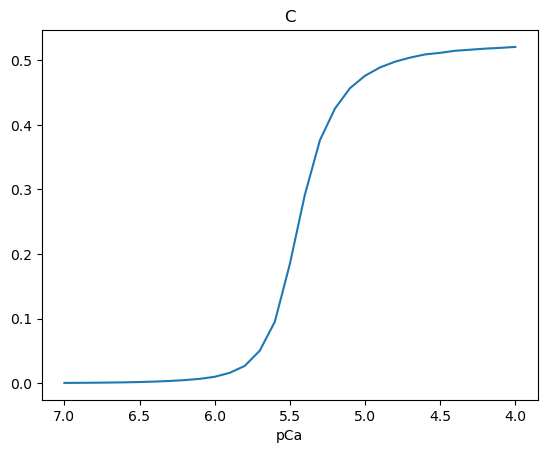

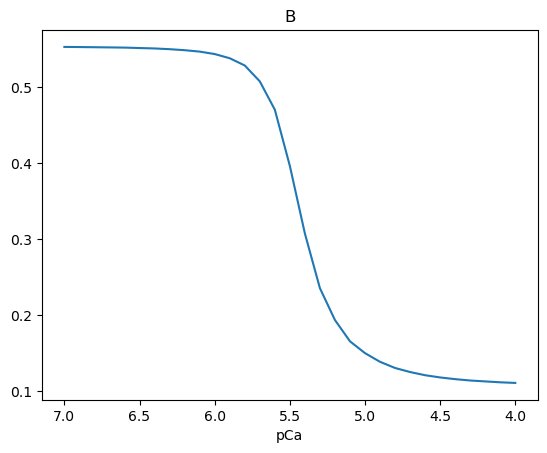

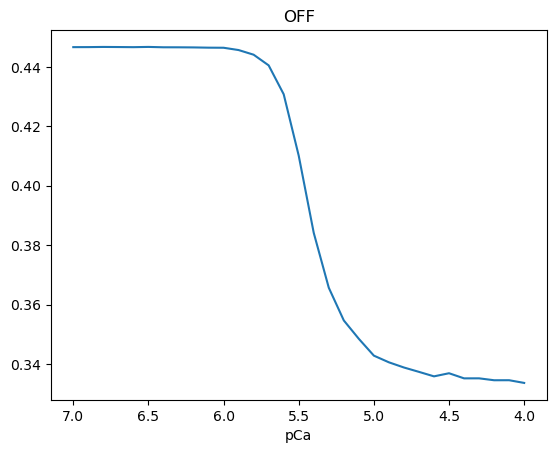

In [4]:
for i in range(1,6):
    plt.figure()
    plt.title(columns_list[i].split()[0])
    plt.plot(np.arange(7,3.9,-0.1),states_df[states_df.Time>500].mean()[i:156:5])
    plt.gca().invert_xaxis()
    plt.xlabel('pCa')
    plt.show()

<Axes: >

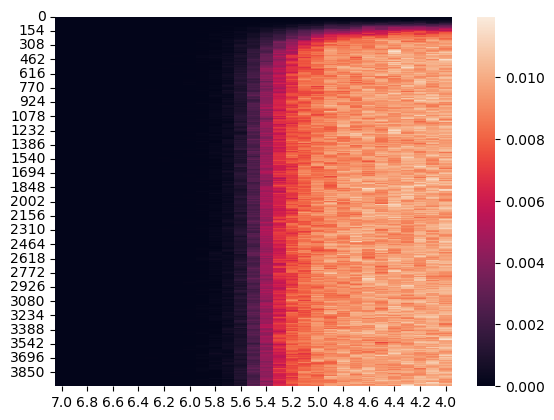

In [5]:
# Force out File
# Using example file: force_out dATP 1.000000 k_force 0.100000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
file_name = 'Force_out dATP 1.000000 k_force 0.100000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv'

pd.read_csv(file_name, header = None)

columns_list = ['Time'] # unit unknown 
for i in np.arange(7,3.9,-0.1):
    new_item = ('{}'.format(round(i,1)))
    columns_list.append(new_item)
        
force_df = pd.read_csv(file_name, names = columns_list)

sns.heatmap(force_df.iloc[:,1:])


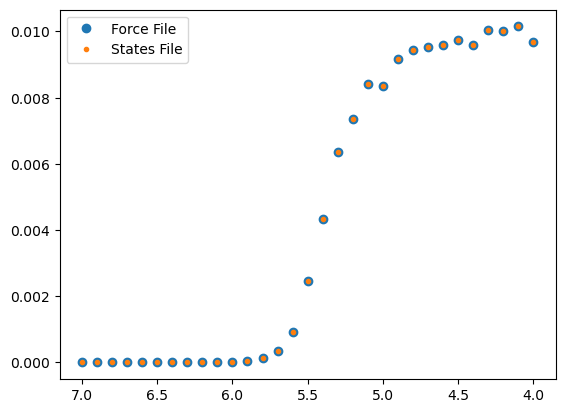

In [6]:
plt.plot(np.arange(7,3.9,-.1), force_df[force_df.Time>=3900/2].iloc[:,1:].mean(), 'o',label ='Force File',)
plt.plot(np.arange(7,3.9,-.1), states_df[states_df.Time>=3900/2].iloc[:,1:156:5].mean(),'.',label = 'States File')
plt.gca().invert_xaxis()
plt.legend()

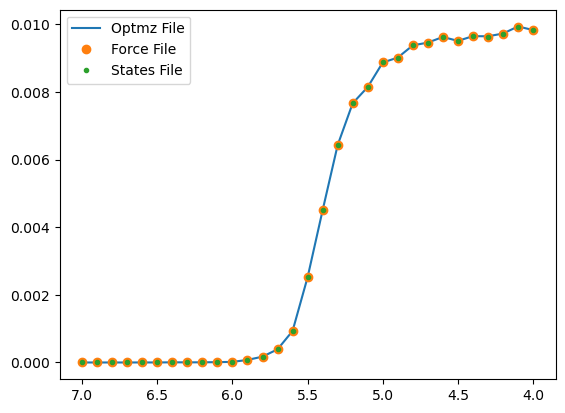

In [7]:
# Force out File
# Using example file: force_out dATP 1.000000 k_force 0.100000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv
file_name = 'Force_pCa_Optmz dATP 1.000000 k_force 0.100000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv'

pd.read_csv(file_name, header = None)


columns_list = ['Time'] # unit unknown 
for i in np.arange(7,3.9,-0.1):
    new_item = ('{}'.format(round(i,1)))
    columns_list.append(new_item)
        
force_pCa_df = pd.read_csv(file_name, names = ['pCa','Force'], )

plt.plot(force_pCa_df['pCa'], force_pCa_df['Force'],label = 'Optmz File')

plt.plot(np.arange(7,3.9,-.1), force_df[force_df.Time>=1500].iloc[:,1:].mean(), 'o',label ='Force File',)
plt.plot(np.arange(7,3.9,-.1), states_df[states_df.Time>=1500].iloc[:,1:156:5].mean(),'.',label = 'States File')
plt.legend()


plt.gca().invert_xaxis()

## Probably trash below this

In [8]:
def create_file_name(prefix, input_parameter_names, input_parameter_values, suffix = ""):
    return_string = prefix+" "
    for i in range(len(input_parameter_names)):
        return_string += " "+input_parameter_names[i] + " " + input_parameter_values[i]
        
    return_string += suffix
    return return_string
    

In [9]:
round(0.3,5)

0.3

0.100000
0.200000
0.300000


Text(0.5, 1.0, 'N Repeats set to 1280 for all k_force')

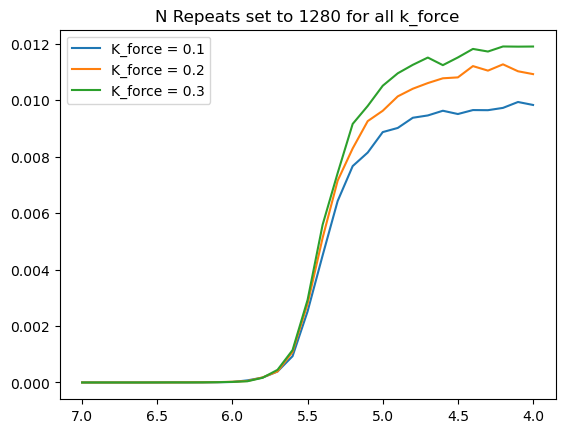

In [10]:
for k_force in [0.1,0.2,0.3]:
    print('{}00000'.format(k_force))

    file_name = 'Force_pCa_Optmz dATP 1.000000 k_force {}00000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv'.format(k_force)

    df = pd.read_csv(file_name, names = ['pCa','Force'])
    plt.plot(df.pCa,df.Force, label = 'K_force = {}'.format(k_force))
plt.gca().invert_xaxis()
plt.legend()
plt.title('N Repeats set to 1280 for all k_force')

In [11]:
parameter_names = ["dATP",
                  "k_force ",
                  "k_plus_SR_ref ",
                  "k_minus_SR_ref "]
parameter_values = ["1.000000",
                   "0.214286",
                   "16.000000",
                   "15.000000"]

create_file_name("Force_out",parameter_names, parameter_values, ".csv")

'Force_out  dATP 1.000000 k_force  0.214286 k_plus_SR_ref  16.000000 k_minus_SR_ref  15.000000.csv'

In [12]:
results_list = []
results_dict = {}


for i in os.listdir():
    if "Force_out" in i:
        print(i.split(sep=".csv")[0])
        results_dict[i.split(sep=".csv")[0]] = np.loadtxt(i, delimiter = ',')

Force_out dATP 1.000000 k_force 0.100000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000
Force_out dATP 1.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000
Force_out dATP 1.000000 k_force 0.300000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000


In [13]:
for key in results_dict.keys():
    print(key)
    print(results_dict[key].shape)

Force_out dATP 1.000000 k_force 0.100000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000
(4001, 32)
Force_out dATP 1.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000
(4001, 32)
Force_out dATP 1.000000 k_force 0.300000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000
(4001, 32)


In [14]:

df = pd.read_csv('Force_out dATP 1.000000 k_force 0.100000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv', 
             names = np.arange(1,33)
           )



top column appears to be time
Then the bottom column appears to 

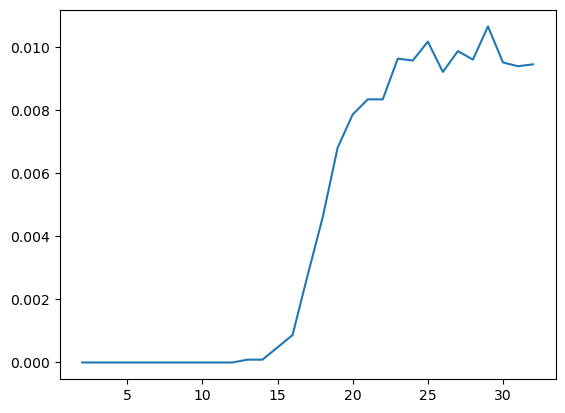

In [15]:
plt.plot(df.iloc[-1,1:])

<Axes: >

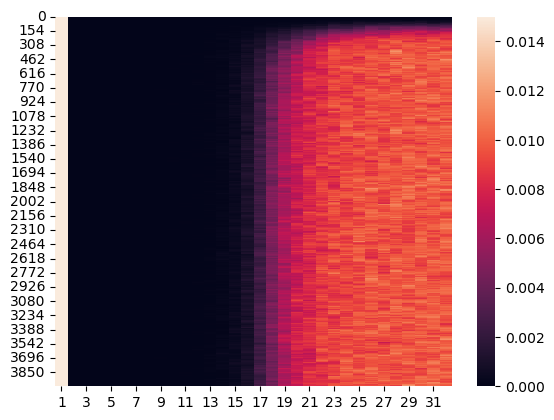

In [16]:
sns.heatmap(df,
           vmax = 0.015)

In [17]:
plt.plot(df_states[83])

NameError: name 'df_states' is not defined

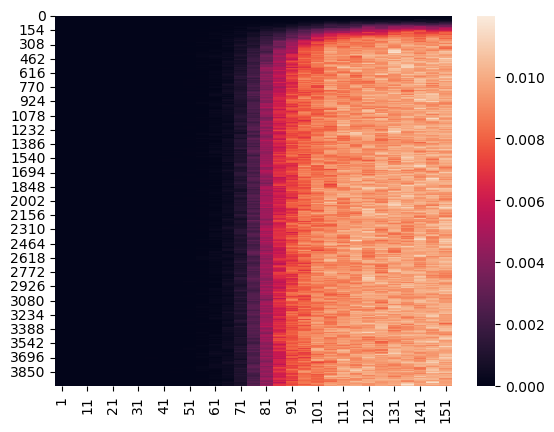

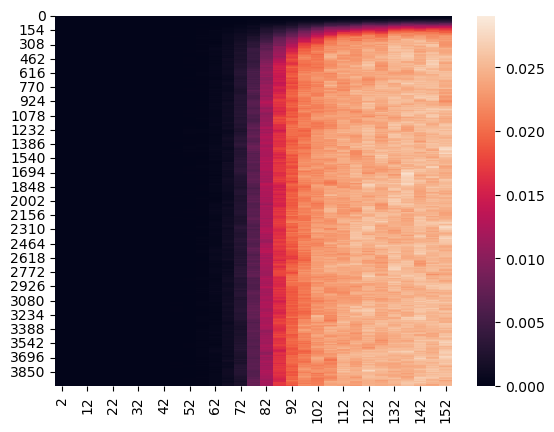

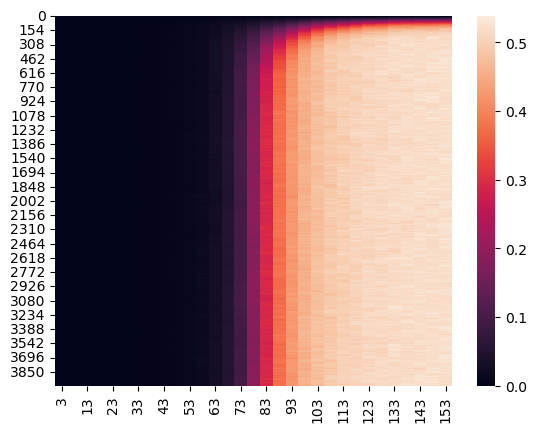

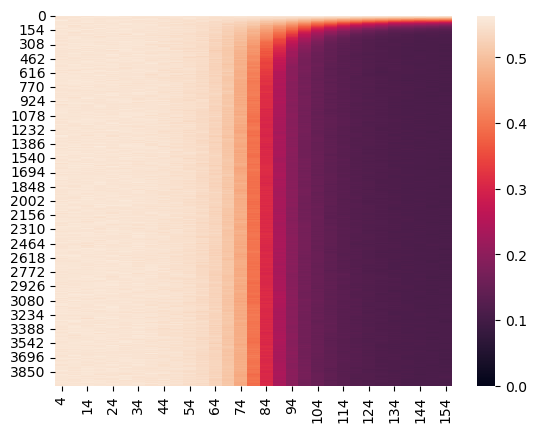

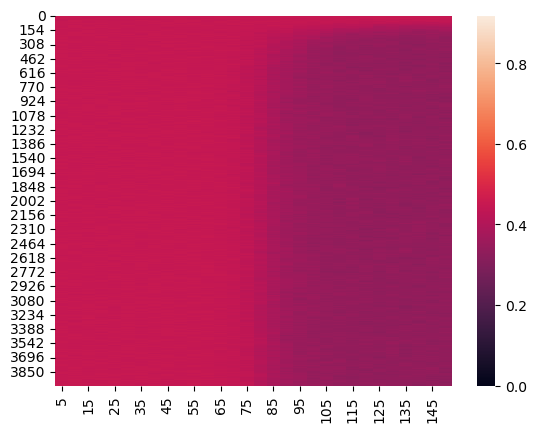

In [18]:
df_states = pd.read_csv('States_out dATP 1.000000 k_force 0.100000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv',
                        header = None)


# States appears to repeat ever 5 instances 

#sns.heatmap(df_states[np.arange(1,20)], )
for k in range(1,6):
    plt.figure()
    sns.heatmap(df_states[np.arange(k,155,5)], vmin = 0)
    

In [19]:
(np.arange(7.1,3.95,-0.1))

array([7.1, 7. , 6.9, 6.8, 6.7, 6.6, 6.5, 6.4, 6.3, 6.2, 6.1, 6. , 5.9,
       5.8, 5.7, 5.6, 5.5, 5.4, 5.3, 5.2, 5.1, 5. , 4.9, 4.8, 4.7, 4.6,
       4.5, 4.4, 4.3, 4.2, 4.1, 4. ])

In [20]:
df

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,1998.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009375,0.009375,0.009916,0.009225,0.010547,0.009615,0.011599,0.009435,0.009495,0.009676
3997,1998.5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009435,0.009435,0.009946,0.009225,0.010457,0.009525,0.011358,0.009405,0.009495,0.009315
3998,1999.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009615,0.009585,0.010036,0.009165,0.009976,0.009555,0.011268,0.009585,0.009585,0.009345
3999,1999.5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009465,0.009826,0.009976,0.009255,0.009766,0.009465,0.010877,0.009615,0.009525,0.009405


In [21]:
df.columns = np.arange(7.1,3.95,-0.1)

In [22]:
columns_names = ['Time'] 
x = 7
while x>=4:
    columns_names.append(round(x, 1))
    x -= 0.1
    
df.columns = columns_names

/tmp/ipykernel_1524898/1151426963.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


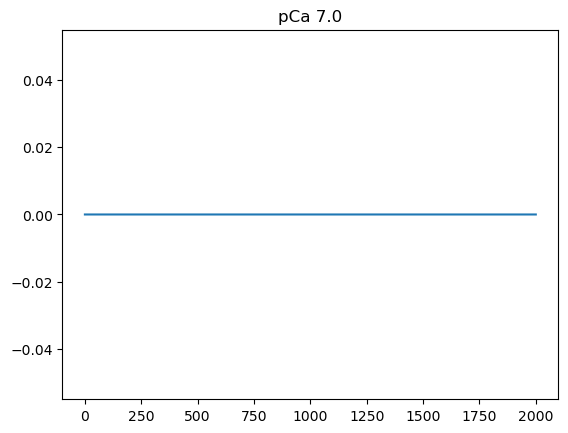

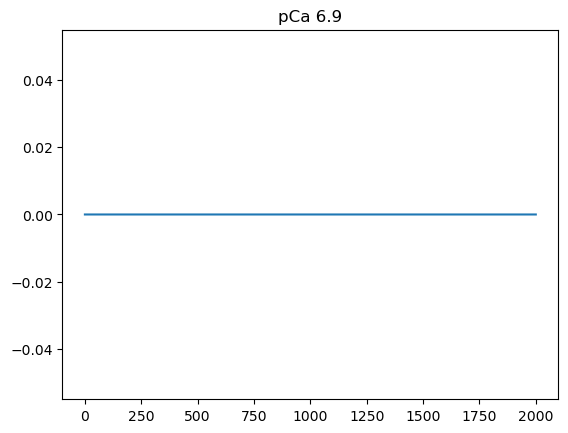

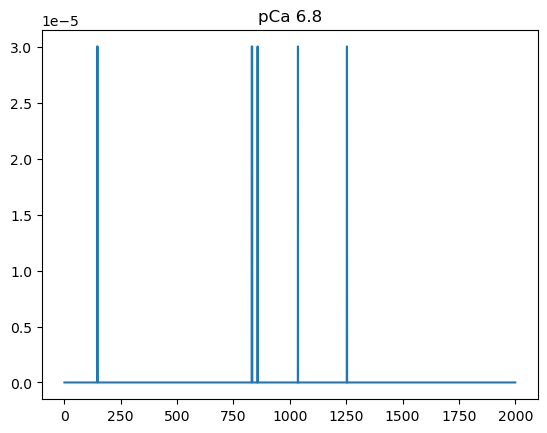

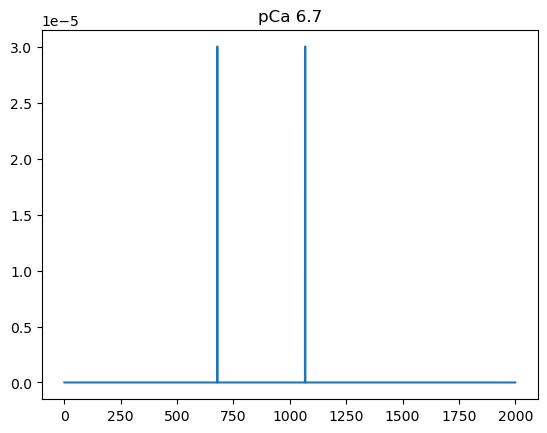

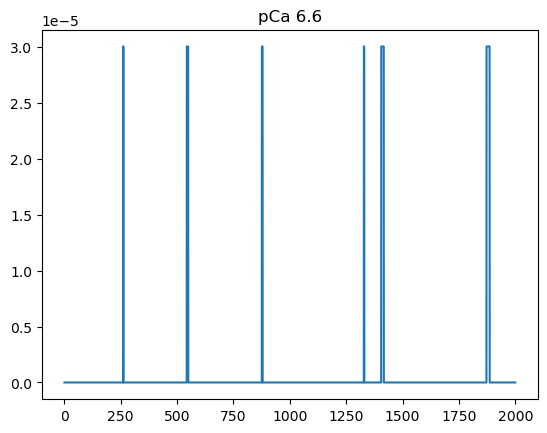

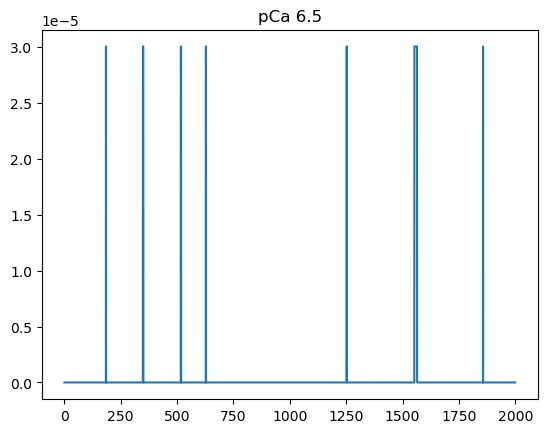

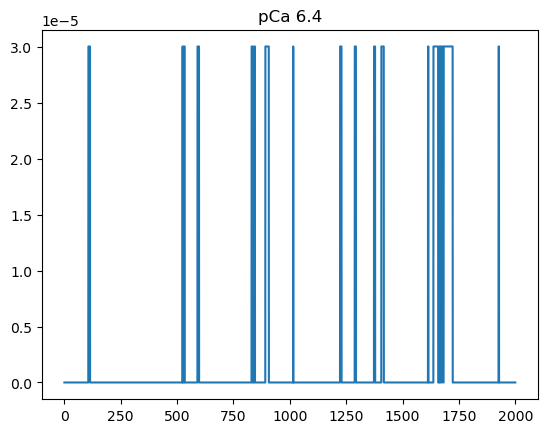

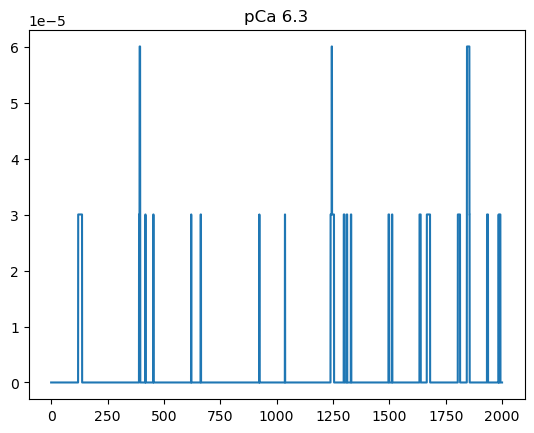

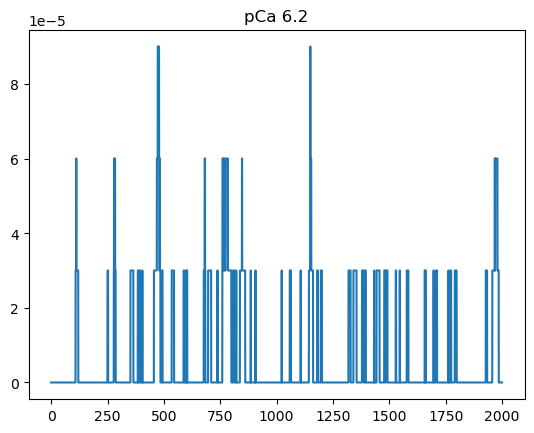

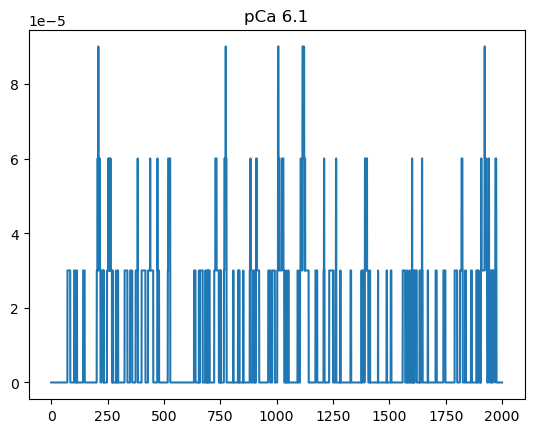

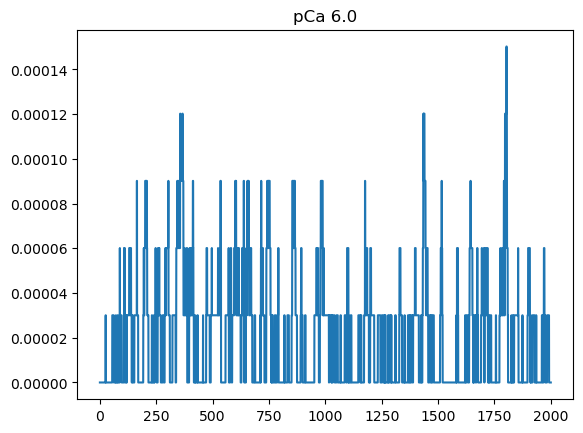

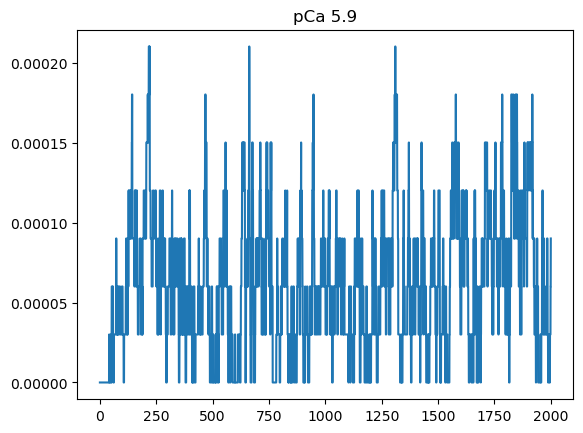

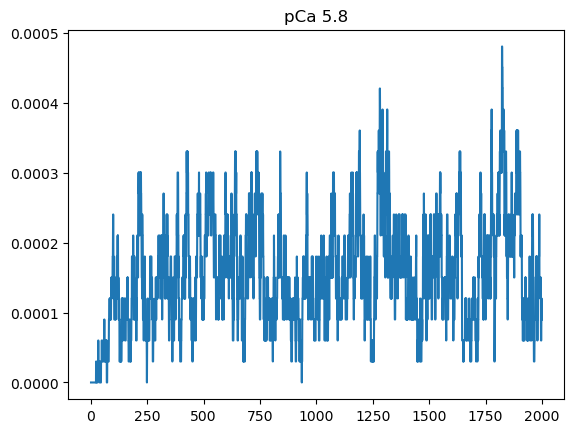

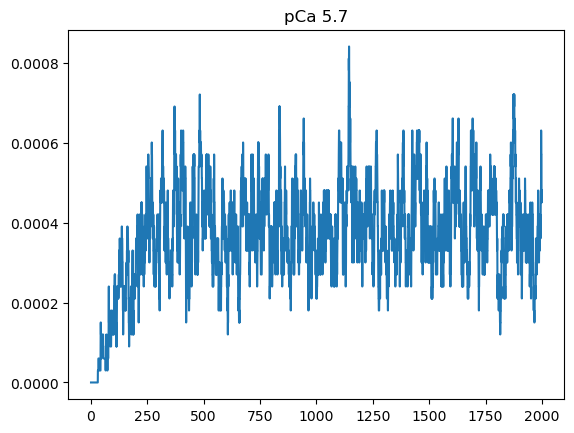

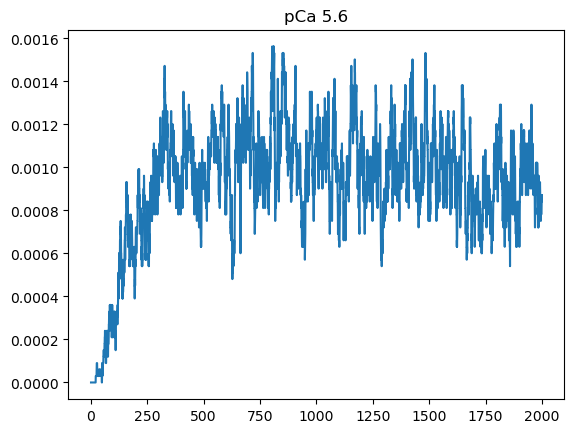

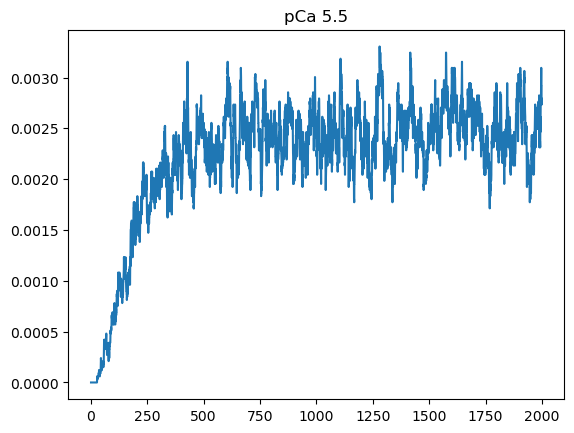

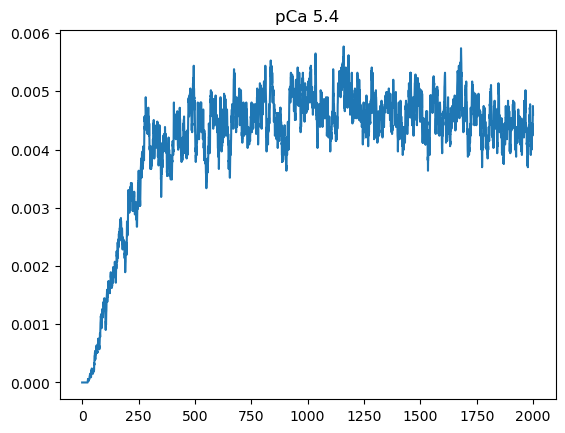

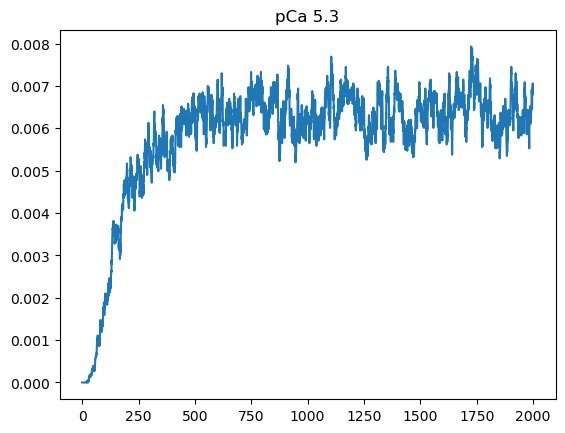

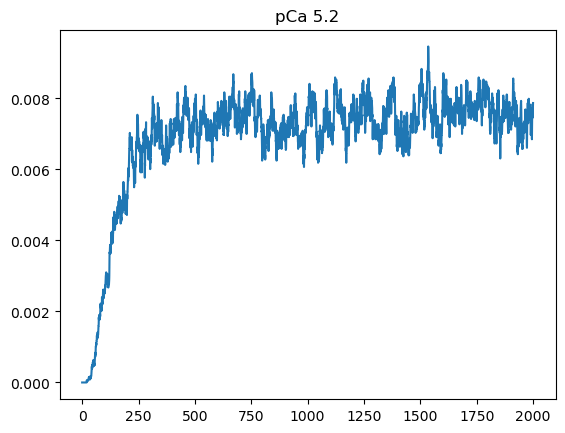

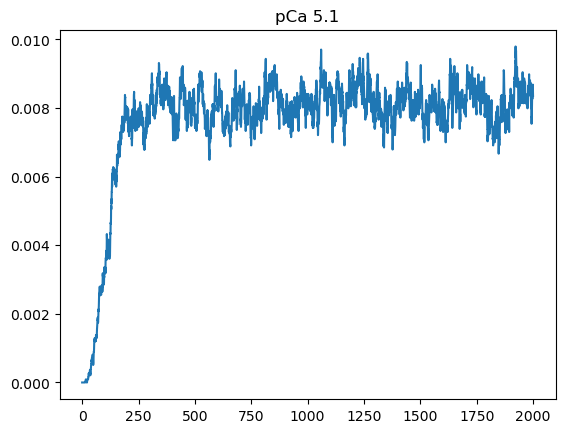

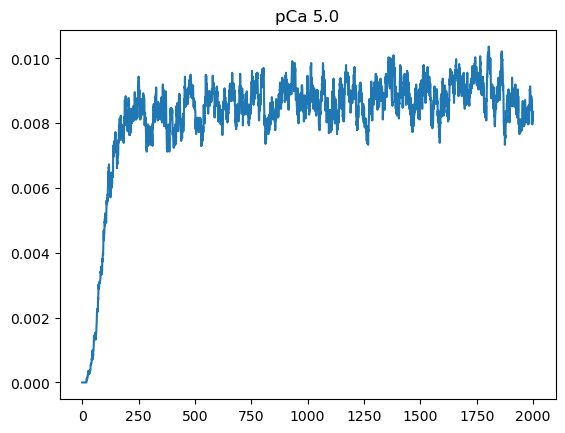

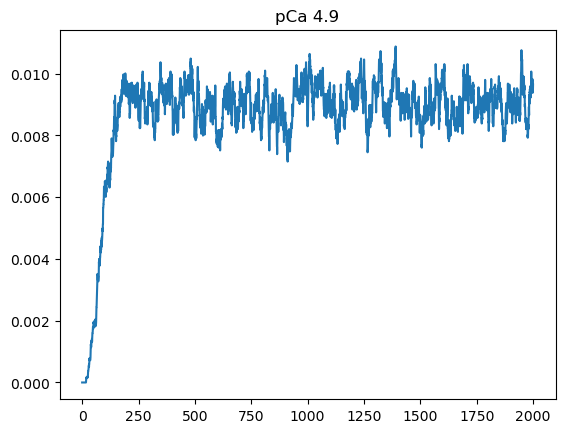

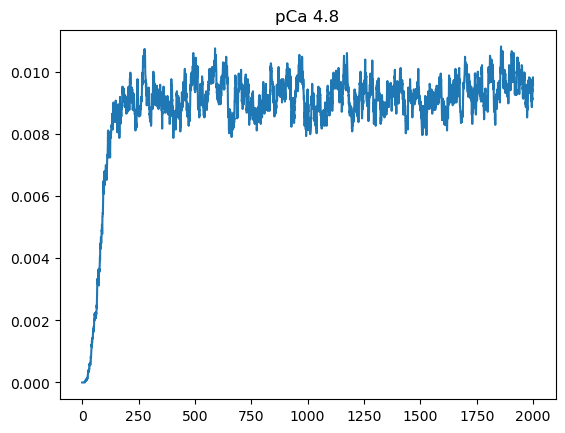

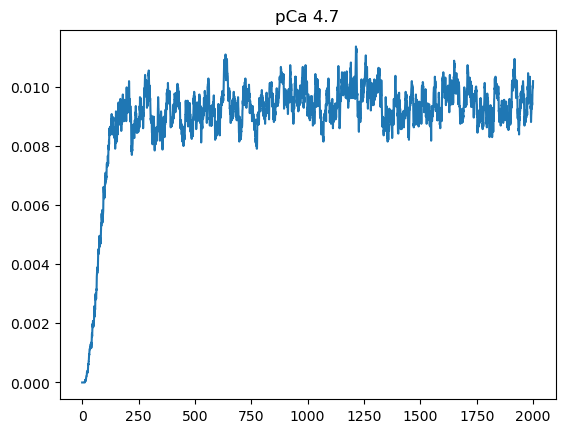

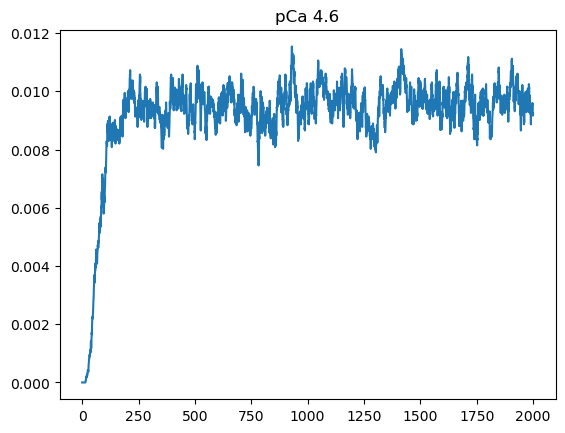

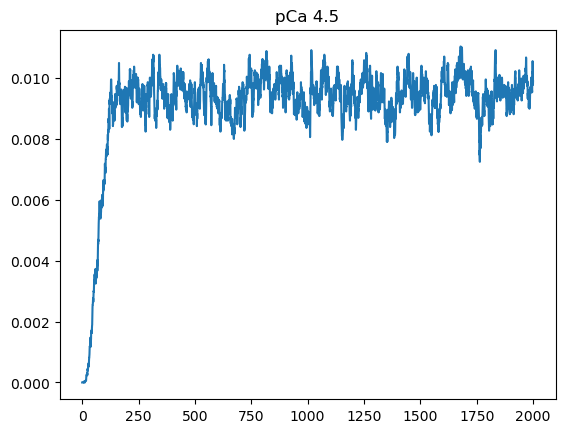

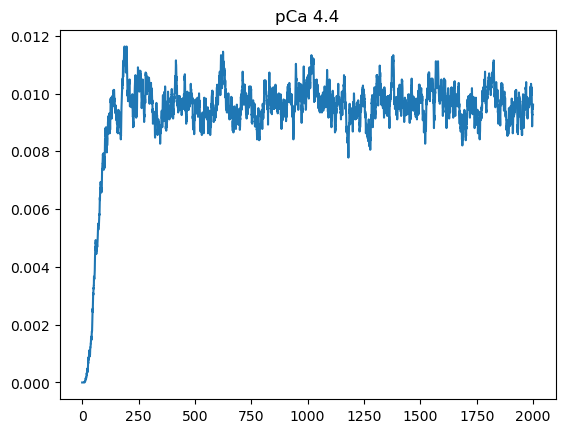

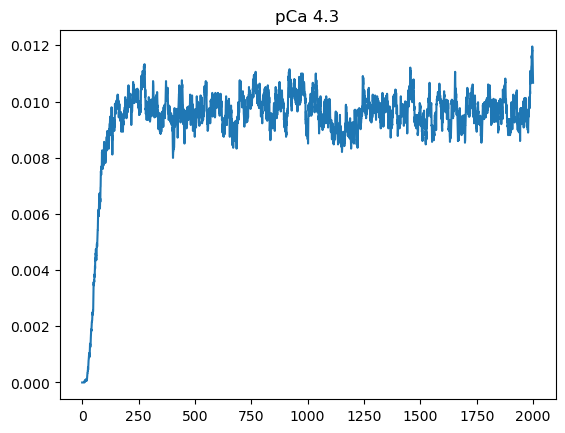

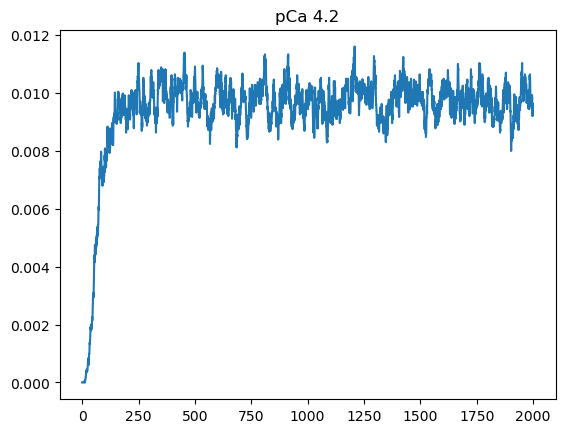

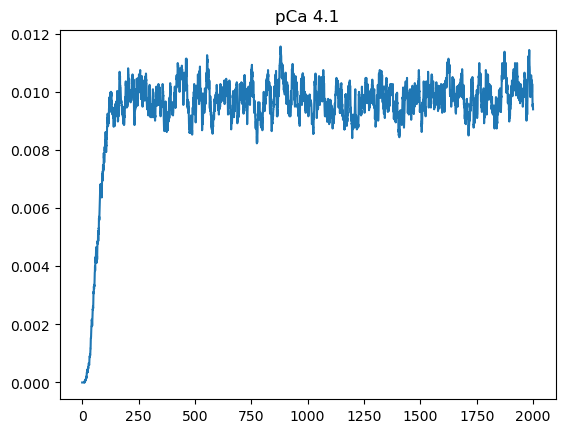

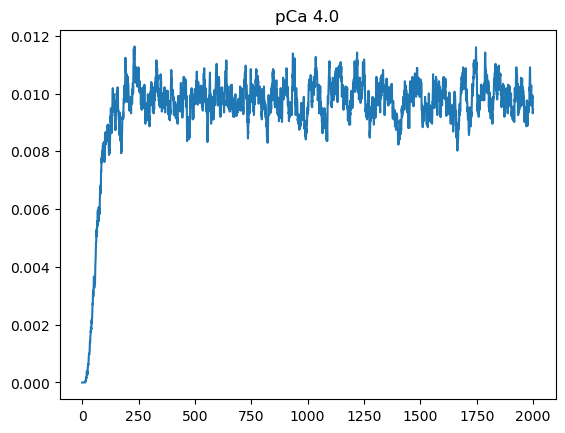

In [23]:
for i in np.linspace(7,4,31):
    i = round(i,1)
    plt.figure()
    plt.plot(df['Time'], df[i])
    plt.title('pCa {}'.format(i))

In [24]:
data = np.loadtxt('Force_out dATP 1.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv', delimiter=",")
data2 = np.loadtxt('Force_out dATP 1.000000 k_force 779.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv', delimiter=",")
data3 = np.loadtxt('Force_pCa_Optmz dATP 1.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv',delimiter = ",")

FileNotFoundError: Force_out dATP 1.000000 k_force 779.000000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv not found.

In [ ]:
plt.plot(data[2000:].mean(axis = 0)[1:],'.-', label = 'ATP')
plt.plot(data2[2000:].mean(axis = 0)[1:],'.-', label = 'dATP')
plt.legend()

In [ ]:
data3 = np.loadtxt('Force_pCa_Optmz dATP 1.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv',delimiter = ",")

plt.plot(*data3.T)

In [ ]:
data4 = np.loadtxt('Force_pCa_Optmz_Normalized dATP 1.000000 k_force 0.200000 k_plus_SR_ref 16.000000 k_minus_SR_ref 15.000000.csv',delimiter = ',')

In [ ]:
plt.plot(*data4.T)